<a href="https://colab.research.google.com/github/mukerem/ACPC2020/blob/main/Handwritten_Amharic_Digit_Recognition_Using_Deep_Learning_CNN_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mount Google drive**

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip '/content/gdrive/MyDrive/PreProcessV3.zip' -d "/content/gdrive/MyDrive/" 

# **Load library**

In [11]:
import keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import warnings

from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers


plt.rcParams.update({'font.size': 12})
config = tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) 
sess = tf.compat.v1.Session(config=config) 
K.set_session(sess)
warnings.filterwarnings('ignore')

In [12]:
%cd /content/gdrive/MyDrive/PreProcessV3/

/content/gdrive/MyDrive/PreProcessV3


In [13]:
batch_size = 32
img_height = 32
img_width = 32

In [14]:
train_data_dir = "/content/gdrive/MyDrive/PreProcessV3/train/"
test_data_dir = "/content/gdrive/MyDrive/PreProcessV3/test/"

#**Load data**


In [15]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.111,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  color_mode="grayscale",
  batch_size=batch_size)

Found 46755 files belonging to 20 classes.
Using 41566 files for training.


In [16]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.111,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  color_mode="grayscale",
  batch_size=batch_size)

Found 46755 files belonging to 20 classes.
Using 5189 files for validation.


In [17]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  image_size=(img_height, img_width),
  color_mode="grayscale",
  batch_size=batch_size)

Found 5197 files belonging to 20 classes.


In [18]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# **Proposed Solution 1**

In [19]:
model1 = keras.Sequential([
            keras.Input(shape = (32, 32, 1)),
            layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
            layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
            layers.MaxPooling2D(),
            layers.Dropout(0.25, input_shape=(2,)),
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
            layers.Conv2D(128, 3, padding = 'same', activation = 'relu'),
            layers.MaxPooling2D(),
            layers.Dropout(0.25, input_shape=(2,)),
            layers.Flatten(),
            layers.Dense(128, activation = 'relu'),
            layers.Dense(20, activation = 'softmax'),
])

In [20]:
model1.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
        optimizer = keras.optimizers.Adam(lr = 1e-3),
        metrics = ['acc'],
)

In [21]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', patience = 2, verbose = 1, factor = 0.5, min_lr = 1e-7)

In [22]:
classifier1 = model1.fit(train_ds, batch_size = batch_size, 
                                 epochs = 30,
                                 callbacks=[reduce_lr],
                                 validation_data = val_ds)

Epoch 1/30
1299/1299 [==============================] - 61s 38ms/step - loss: 1.3781 - acc: 0.5833 - val_loss: 0.4569 - val_acc: 0.8772 - lr: 0.0010
Epoch 2/30
1299/1299 [==============================] - 7s 5ms/step - loss: 0.4515 - acc: 0.8815 - val_loss: 0.3306 - val_acc: 0.9175 - lr: 0.0010
Epoch 3/30
1299/1299 [==============================] - 7s 5ms/step - loss: 0.3329 - acc: 0.9153 - val_loss: 0.2940 - val_acc: 0.9252 - lr: 0.0010
Epoch 4/30
1299/1299 [==============================] - 7s 5ms/step - loss: 0.2756 - acc: 0.9287 - val_loss: 0.2677 - val_acc: 0.9341 - lr: 0.0010
Epoch 5/30
1299/1299 [==============================] - 7s 5ms/step - loss: 0.2476 - acc: 0.9345 - val_loss: 0.2780 - val_acc: 0.9370 - lr: 0.0010
Epoch 6/30
1294/1299 [============================>.] - ETA: 0s - loss: 0.2302 - acc: 0.9389
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1299/1299 [==============================] - 7s 5ms/step - loss: 0.2306 - acc: 0.9388 - val_lo

In [23]:
model1.evaluate(test_ds, batch_size=batch_size)

163/163 [==============================] - 5s 28ms/step - loss: 0.2946 - acc: 0.9565


[0.29461410641670227, 0.9565133452415466]

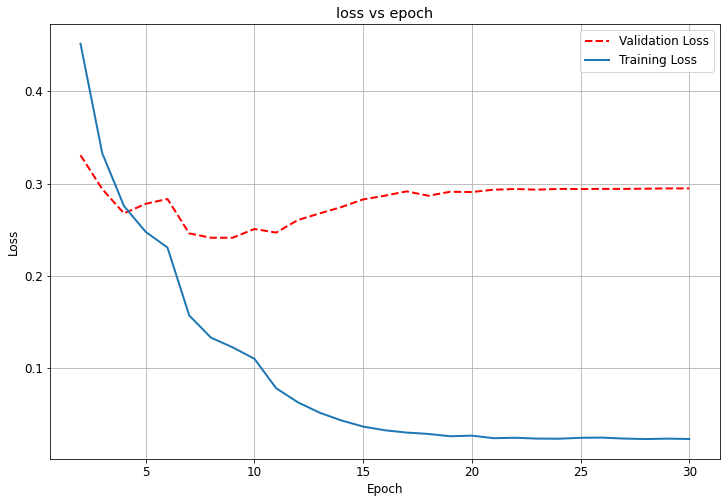

In [24]:
fig = plt.figure(figsize=(12,8))
plt.plot(classifier1.history['val_loss'][1:], 'r--', linewidth=2)
plt.plot(classifier1.history['loss'][1:], linewidth=2)

d = classifier1.history['val_loss']
plt.xticks(np.arange(3, len(d), step=5), np.arange(5, len(d)+1, step=5))

plt.legend(['Validation Loss', "Training Loss"], loc='upper right')
plt.title('loss vs epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()

fig.savefig('overall-loss-1-02946.png', bbox_inches='tight')

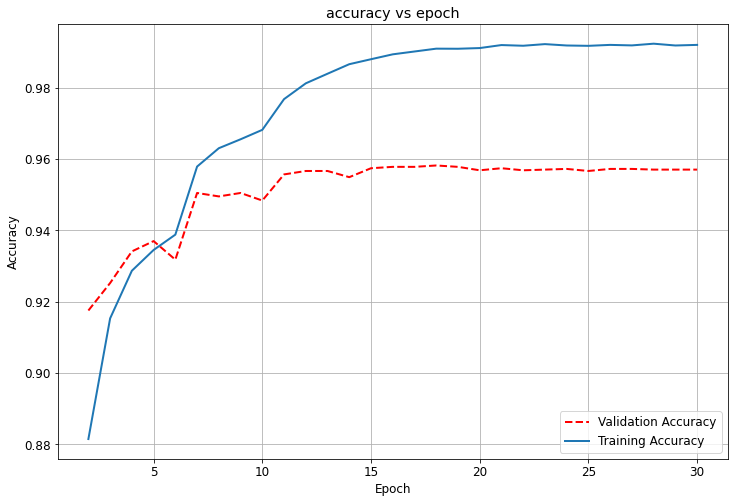

In [25]:
fig2 = plt.figure(figsize=(12,8))
plt.plot(classifier1.history['val_acc'][1:], 'r--', linewidth=2)
plt.plot(classifier1.history['acc'][1:], linewidth=2)

d = classifier1.history['val_acc']
plt.xticks(np.arange(3, len(d), step=5), np.arange(5, len(d)+1, step=5), fontsize=12)

plt.legend(['Validation Accuracy', "Training Accuracy"], loc='lower right')
plt.title('accuracy vs epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()

fig2.savefig('overall-accuracy-1-9565.png', bbox_inches='tight')

# **Proposed Solution 2**

In [28]:
model2 = keras.Sequential([
            keras.Input(shape = (32, 32, 1)),
            layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
            layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
            layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
            layers.MaxPooling2D(),
            layers.Dropout(0.25, input_shape=(2,)),
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(128, 3, padding = 'same', activation = 'relu'),
            layers.MaxPooling2D(),
            layers.Dropout(0.25, input_shape=(2,)),
            layers.Flatten(),
            layers.Dense(128, activation = 'relu'),
            layers.Dense(20, activation = 'softmax'),
])

In [29]:
model2.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
        optimizer = keras.optimizers.Adam(lr = 1e-3),
        metrics = ['acc'],
)

In [30]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', patience = 2, verbose = 1, factor = 0.5, min_lr = 1e-7)

In [31]:
classifier2 = model2.fit(train_ds, batch_size = batch_size, 
                                 epochs = 30,
                                 callbacks=[reduce_lr],
                                 validation_data = val_ds)

Epoch 1/30
1299/1299 [==============================] - 10s 7ms/step - loss: 1.7214 - acc: 0.4528 - val_loss: 0.6870 - val_acc: 0.8092 - lr: 0.0010
Epoch 2/30
1299/1299 [==============================] - 8s 6ms/step - loss: 0.5546 - acc: 0.8501 - val_loss: 0.4149 - val_acc: 0.8900 - lr: 0.0010
Epoch 3/30
1299/1299 [==============================] - 8s 6ms/step - loss: 0.4086 - acc: 0.8953 - val_loss: 0.3498 - val_acc: 0.9152 - lr: 0.0010
Epoch 4/30
1299/1299 [==============================] - 8s 6ms/step - loss: 0.3436 - acc: 0.9135 - val_loss: 0.3183 - val_acc: 0.9206 - lr: 0.0010
Epoch 5/30
1299/1299 [==============================] - 8s 6ms/step - loss: 0.3109 - acc: 0.9221 - val_loss: 0.3177 - val_acc: 0.9210 - lr: 0.0010
Epoch 6/30
1299/1299 [==============================] - 8s 6ms/step - loss: 0.2840 - acc: 0.9285 - val_loss: 0.3096 - val_acc: 0.9264 - lr: 0.0010
Epoch 7/30
1299/1299 [==============================] - 8s 6ms/step - loss: 0.2686 - acc: 0.9345 - val_loss: 0.2923 -

In [32]:
model2.evaluate(test_ds, batch_size=batch_size)

163/163 [==============================] - 5s 29ms/step - loss: 0.2928 - acc: 0.9471


[0.29278141260147095, 0.9470848441123962]

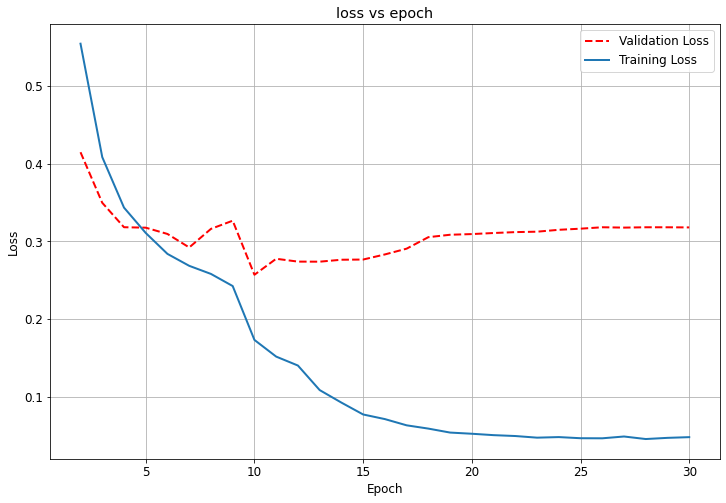

In [34]:
fig = plt.figure(figsize=(12,8))
plt.plot(classifier2.history['val_loss'][1:], 'r--', linewidth=2)
plt.plot(classifier2.history['loss'][1:], linewidth=2)

d = classifier2.history['val_loss']
plt.xticks(np.arange(3, len(d), step=5), np.arange(5, len(d)+1, step=5))

plt.legend(['Validation Loss', "Training Loss"], loc='upper right')
plt.title('loss vs epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()

fig.savefig('overall-loss-2-02928.png', bbox_inches='tight')

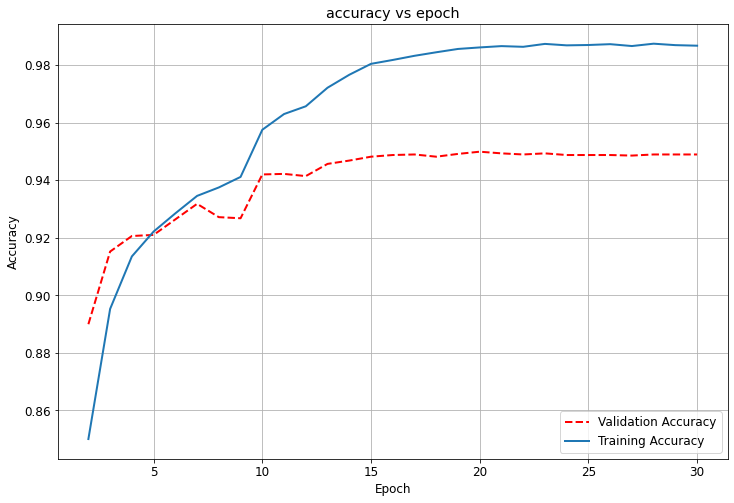

In [35]:
fig2 = plt.figure(figsize=(12,8))
plt.plot(classifier2.history['val_acc'][1:], 'r--', linewidth=2)
plt.plot(classifier2.history['acc'][1:], linewidth=2)

d = classifier2.history['val_acc']
plt.xticks(np.arange(3, len(d), step=5), np.arange(5, len(d)+1, step=5), fontsize=12)

plt.legend(['Validation Accuracy', "Training Accuracy"], loc='lower right')
plt.title('accuracy vs epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()

fig2.savefig('overall-accuracy-2-9471.png', bbox_inches='tight')

# **Proposed Solution 3**

In [36]:
model3 = keras.Sequential([
            keras.Input(shape = (32, 32, 1)),
            layers.Conv2D(32, 3, padding = 'same', activation = 'relu', name="Conv1"),
            layers.Conv2D(32, 3, padding = 'same', activation = 'relu', name="Conv2"),
            layers.MaxPooling2D(name="Maxpool1"),
            layers.Conv2D(32, 3, padding = 'same', activation = 'relu', name="Conv3"),
            layers.Conv2D(32, 3, padding = 'same', activation = 'relu', name="Conv4"),
            layers.MaxPooling2D(name="Maxpool2"),
            layers.Dropout(0.2, input_shape=(2,)),
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu', name="Conv5"),
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu', name="Conv6"),
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu', name="Conv7"),
            layers.MaxPooling2D(name="Maxpool3"),
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu', name="Conv8"),
            layers.Conv2D(128, 3, padding = 'same', activation = 'relu', name="Conv9"),
            layers.MaxPooling2D(name="Maxpool4"),
            layers.Dropout(0.25, input_shape=(2,)),
            layers.Flatten(name="Flatten1"),
            layers.Dense(128, activation = 'relu', name="Dense1"),
            layers.Dense(20, activation = 'softmax', name="Dense2"),
])

In [37]:
model3.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
        optimizer = keras.optimizers.Adam(lr = 1e-3),
        metrics = ['acc'],
)

In [38]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', patience = 2, verbose = 1, factor = 0.5, min_lr = 1e-7)

In [39]:
classifier3 = model3.fit(train_ds, batch_size = batch_size, 
                                 epochs = 30,
                                 callbacks=[reduce_lr],
                                 validation_data = val_ds)

Epoch 1/30
1299/1299 [==============================] - 9s 6ms/step - loss: 1.4306 - acc: 0.5575 - val_loss: 0.6336 - val_acc: 0.8214 - lr: 0.0010
Epoch 2/30
1299/1299 [==============================] - 8s 6ms/step - loss: 0.5214 - acc: 0.8596 - val_loss: 0.4035 - val_acc: 0.8963 - lr: 0.0010
Epoch 3/30
1299/1299 [==============================] - 9s 7ms/step - loss: 0.4019 - acc: 0.8939 - val_loss: 0.3496 - val_acc: 0.9106 - lr: 0.0010
Epoch 4/30
1299/1299 [==============================] - 8s 6ms/step - loss: 0.3447 - acc: 0.9095 - val_loss: 0.3142 - val_acc: 0.9212 - lr: 0.0010
Epoch 5/30
1299/1299 [==============================] - 8s 6ms/step - loss: 0.3148 - acc: 0.9186 - val_loss: 0.3166 - val_acc: 0.9204 - lr: 0.0010
Epoch 6/30
1299/1299 [==============================] - 8s 6ms/step - loss: 0.2920 - acc: 0.9240 - val_loss: 0.2919 - val_acc: 0.9260 - lr: 0.0010
Epoch 7/30
1299/1299 [==============================] - 8s 6ms/step - loss: 0.2817 - acc: 0.9270 - val_loss: 0.2853 - 

In [40]:
model3.evaluate(test_ds, batch_size=batch_size)

163/163 [==============================] - 5s 28ms/step - loss: 0.2908 - acc: 0.9498


[0.29078152775764465, 0.9497787356376648]

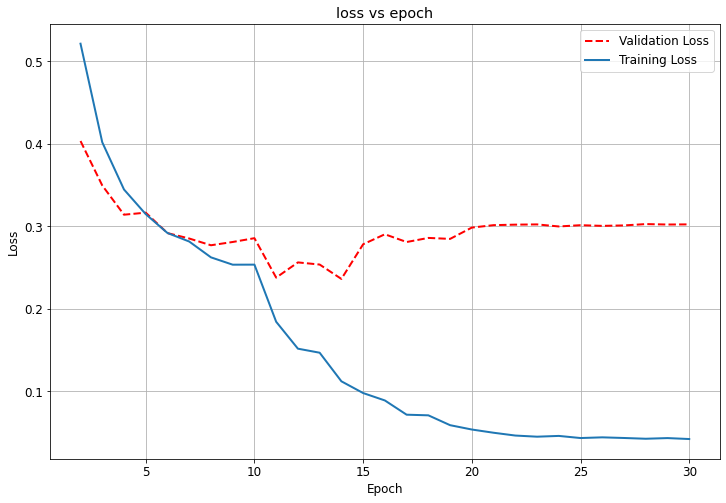

In [41]:
fig = plt.figure(figsize=(12,8))
plt.plot(classifier3.history['val_loss'][1:], 'r--', linewidth=2)
plt.plot(classifier3.history['loss'][1:], linewidth=2)

d = classifier3.history['val_loss']
plt.xticks(np.arange(3, len(d), step=5), np.arange(5, len(d)+1, step=5))

plt.legend(['Validation Loss', "Training Loss"], loc='upper right')
plt.title('loss vs epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()

fig.savefig('overall-loss-3-02908.png', bbox_inches='tight')

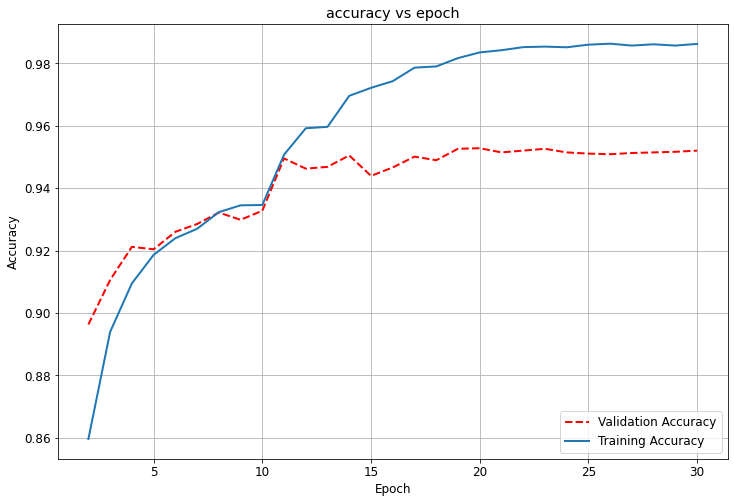

In [43]:
fig2 = plt.figure(figsize=(12,8))
plt.plot(classifier3.history['val_acc'][1:], 'r--', linewidth=2)
plt.plot(classifier3.history['acc'][1:], linewidth=2)

d = classifier3.history['val_acc']
plt.xticks(np.arange(3, len(d), step=5), np.arange(5, len(d)+1, step=5), fontsize=12)

plt.legend(['Validation Accuracy', "Training Accuracy"], loc='lower right')
plt.title('accuracy vs epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()

fig2.savefig('overall-accuracy-3-9498.png', bbox_inches='tight')

# **Proposed Solution 4**

In [45]:
model4 = keras.Sequential([
            keras.Input(shape = (32, 32, 1)),
            layers.Conv2D(32, 3, padding = 'same', activation = 'relu', name="Conv1"),
            layers.Conv2D(32, 3, padding = 'same', activation = 'relu', name="Conv2"),
            layers.Conv2D(32, 3, padding = 'same', activation = 'relu', name="Conv3"),
            layers.MaxPooling2D(name="Maxpool1"),
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu', name="Conv4"),
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu', name="Conv5"),
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu', name="Conv6"),
            layers.MaxPooling2D(name="Maxpool2"),
            layers.Dropout(0.25, input_shape=(2,)),
            layers.Conv2D(128, 3, padding = 'same', activation = 'relu', name="Conv8"),
            layers.MaxPooling2D(name="Maxpool3"),
            layers.Dropout(0.25, input_shape=(2,)),
            layers.Flatten(name="Flatten1"),
            layers.Dense(128, activation = 'relu', name="Dense1"),
            layers.Dense(20, activation = 'softmax', name="Dense2"),
])

In [46]:
model4.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
        optimizer = keras.optimizers.Adam(lr = 1e-3),
        metrics = ['acc'],
)

In [47]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', patience = 2, verbose = 1, factor = 0.5, min_lr = 1e-7)

In [48]:
classifier4 = model4.fit(train_ds, batch_size = batch_size, 
                                 epochs = 30,
                                 callbacks=[reduce_lr],
                                 validation_data = val_ds)

Epoch 1/30
1299/1299 [==============================] - 10s 7ms/step - loss: 1.2800 - acc: 0.6176 - val_loss: 0.4857 - val_acc: 0.8745 - lr: 0.0010
Epoch 2/30
1299/1299 [==============================] - 9s 7ms/step - loss: 0.4271 - acc: 0.8888 - val_loss: 0.3266 - val_acc: 0.9189 - lr: 0.0010
Epoch 3/30
1299/1299 [==============================] - 9s 7ms/step - loss: 0.3155 - acc: 0.9197 - val_loss: 0.2860 - val_acc: 0.9308 - lr: 0.0010
Epoch 4/30
1299/1299 [==============================] - 9s 7ms/step - loss: 0.2668 - acc: 0.9308 - val_loss: 0.2608 - val_acc: 0.9351 - lr: 0.0010
Epoch 5/30
1299/1299 [==============================] - 9s 7ms/step - loss: 0.2379 - acc: 0.9386 - val_loss: 0.2779 - val_acc: 0.9352 - lr: 0.0010
Epoch 6/30
1299/1299 [==============================] - 9s 7ms/step - loss: 0.2143 - acc: 0.9443 - val_loss: 0.2594 - val_acc: 0.9379 - lr: 0.0010
Epoch 7/30
1299/1299 [==============================] - 9s 7ms/step - loss: 0.1991 - acc: 0.9467 - val_loss: 0.2581 -

In [49]:
model4.evaluate(test_ds, batch_size=batch_size)

163/163 [==============================] - 5s 29ms/step - loss: 0.3032 - acc: 0.9542


[0.3032074570655823, 0.9542043209075928]

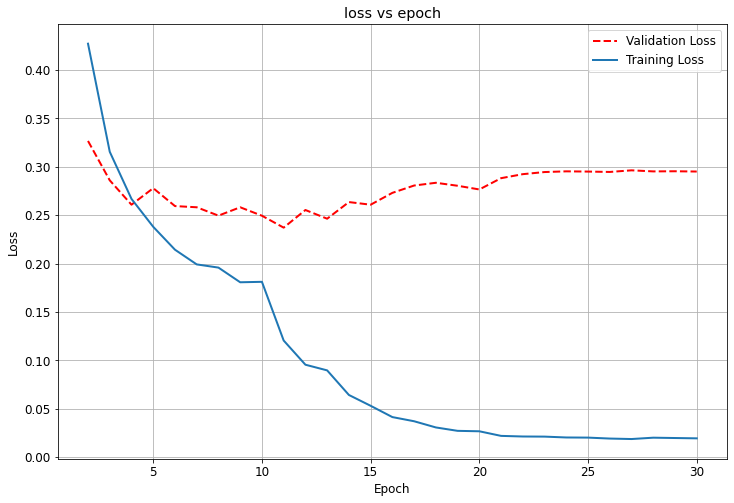

In [50]:
fig = plt.figure(figsize=(12,8))
plt.plot(classifier4.history['val_loss'][1:], 'r--', linewidth=2)
plt.plot(classifier4.history['loss'][1:], linewidth=2)

d = classifier4.history['val_loss']
plt.xticks(np.arange(3, len(d), step=5), np.arange(5, len(d)+1, step=5))

plt.legend(['Validation Loss', "Training Loss"], loc='upper right')
plt.title('loss vs epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()

fig.savefig('overall-loss-4-03032.png', bbox_inches='tight')

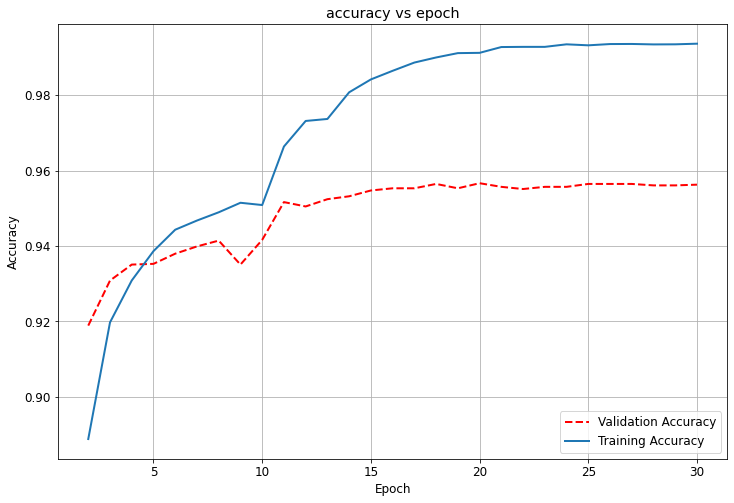

In [51]:
fig2 = plt.figure(figsize=(12,8))
plt.plot(classifier4.history['val_acc'][1:], 'r--', linewidth=2)
plt.plot(classifier4.history['acc'][1:], linewidth=2)

d = classifier4.history['val_acc']
plt.xticks(np.arange(3, len(d), step=5), np.arange(5, len(d)+1, step=5), fontsize=12)

plt.legend(['Validation Accuracy', "Training Accuracy"], loc='lower right')
plt.title('accuracy vs epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()

fig2.savefig('overall-accuracy-4-9542.png', bbox_inches='tight')

# **Proposed Solution 5**

In [52]:
model5 = keras.Sequential([
            keras.Input(shape = (32, 32, 1)),
            layers.Conv2D(32, 3, padding = 'same', activation = 'relu', name="Conv1"),
            layers.Conv2D(32, 3, padding = 'same', activation = 'relu', name="Conv2"),
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu', name="Conv4"),
            layers.MaxPooling2D(name="Maxpool1"),
            layers.Dropout(0.2, input_shape=(2,)),
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu', name="Conv5"),
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu', name="Conv7"),
            layers.Conv2D(128, 3, padding = 'same', activation = 'relu', name="Conv8"),
            layers.MaxPooling2D(name="Maxpool2"),
            layers.Dropout(0.25, input_shape=(2,)),
            layers.Flatten(name="Flatten1"),
            layers.Dense(128, activation = 'relu', name="Dense1"),
            layers.Dense(20, activation = 'softmax', name="Dense2"),
])

In [53]:
model5.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
        optimizer = keras.optimizers.Adam(lr = 1e-3),
        metrics = ['acc'],
)

In [54]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', patience = 2, verbose = 1, factor = 0.5, min_lr = 1e-7)

In [55]:
classifier5 = model5.fit(train_ds, batch_size = batch_size, 
                                 epochs = 30,
                                 callbacks=[reduce_lr],
                                 validation_data = val_ds)

Epoch 1/30
1299/1299 [==============================] - 11s 8ms/step - loss: 1.5040 - acc: 0.5493 - val_loss: 0.5583 - val_acc: 0.8400 - lr: 0.0010
Epoch 2/30
1299/1299 [==============================] - 10s 8ms/step - loss: 0.4532 - acc: 0.8797 - val_loss: 0.3490 - val_acc: 0.9104 - lr: 0.0010
Epoch 3/30
1299/1299 [==============================] - 10s 8ms/step - loss: 0.3112 - acc: 0.9198 - val_loss: 0.3090 - val_acc: 0.9193 - lr: 0.0010
Epoch 4/30
1299/1299 [==============================] - 10s 8ms/step - loss: 0.2503 - acc: 0.9319 - val_loss: 0.3352 - val_acc: 0.9156 - lr: 0.0010
Epoch 5/30
1299/1299 [==============================] - 10s 8ms/step - loss: 0.2118 - acc: 0.9422 - val_loss: 0.3071 - val_acc: 0.9258 - lr: 0.0010
Epoch 6/30
1299/1299 [==============================] - 10s 8ms/step - loss: 0.1818 - acc: 0.9480 - val_loss: 0.3482 - val_acc: 0.9246 - lr: 0.0010
Epoch 7/30
1298/1299 [============================>.] - ETA: 0s - loss: 0.1628 - acc: 0.9539
Epoch 7: ReduceLROn

In [56]:
model5.evaluate(test_ds, batch_size=batch_size)

163/163 [==============================] - 5s 28ms/step - loss: 0.5222 - acc: 0.9523


[0.522214412689209, 0.9522801637649536]

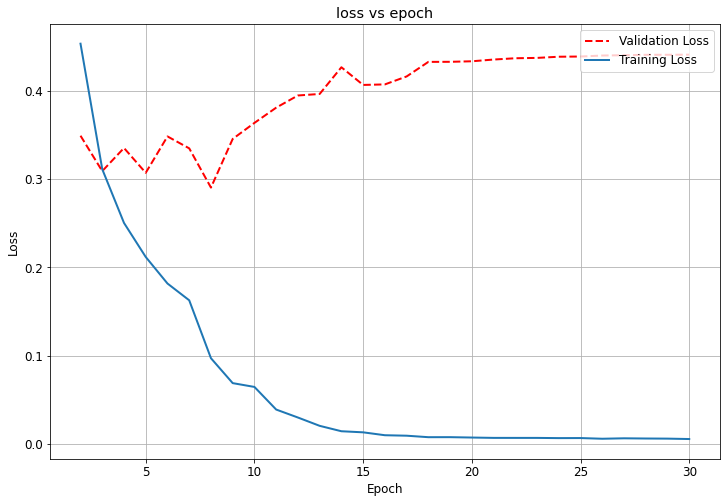

In [57]:
fig = plt.figure(figsize=(12,8))
plt.plot(classifier5.history['val_loss'][1:], 'r--', linewidth=2)
plt.plot(classifier5.history['loss'][1:], linewidth=2)

d = classifier5.history['val_loss']
plt.xticks(np.arange(3, len(d), step=5), np.arange(5, len(d)+1, step=5))

plt.legend(['Validation Loss', "Training Loss"], loc='upper right')
plt.title('loss vs epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()

fig.savefig('overall-loss-5-05222.png', bbox_inches='tight')

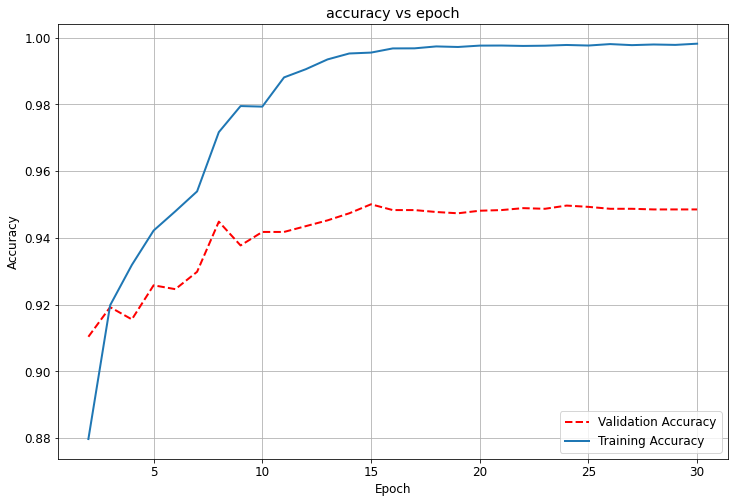

In [58]:
fig2 = plt.figure(figsize=(12,8))
plt.plot(classifier5.history['val_acc'][1:], 'r--', linewidth=2)
plt.plot(classifier5.history['acc'][1:], linewidth=2)

d = classifier5.history['val_acc']
plt.xticks(np.arange(3, len(d), step=5), np.arange(5, len(d)+1, step=5), fontsize=12)

plt.legend(['Validation Accuracy', "Training Accuracy"], loc='lower right')
plt.title('accuracy vs epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()

fig2.savefig('overall-accuracy-5-9523.png', bbox_inches='tight')

# **Proposed Solution 6**

In [79]:
model6 = keras.Sequential([
            keras.Input(shape = (32, 32, 1)),
            layers.Conv2D(32, 3, padding = 'same', activation = 'relu', name="Conv1"),
            layers.Conv2D(32, 3, padding = 'same', activation = 'relu', name="Conv2"),
            layers.Conv2D(32, 3, padding = 'same', activation = 'relu', name="Conv3"),
            layers.MaxPooling2D(name="Maxpool1"),
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu', name="Conv4"),
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu', name="Conv5"),
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu', name="Conv6"),
            layers.MaxPooling2D(name="Maxpool2"),
            layers.Dropout(0.2, input_shape=(2,)),
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu', name="Conv7"),
            layers.MaxPooling2D(name="Maxpool3"),
            layers.Dropout(0.25, input_shape=(2,)),
            layers.Conv2D(128, 3, padding = 'same', activation = 'relu', name="Conv8"),
            layers.MaxPooling2D(name="Maxpool4"),
            layers.Dropout(0.25, input_shape=(2,)),
            layers.Flatten(name="Flatten1"),
            layers.Dense(128, activation = 'relu', name="Dense1"),
            layers.Dense(20, activation = 'softmax', name="Dense2"),
])

In [80]:
adam =  keras.optimizers.Adam(lr=1e-3)

In [81]:
model6.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
        optimizer = adam,
        metrics = ['acc'],
)

In [82]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', patience = 1, verbose = 1, factor = 0.5, min_lr = 1e-7)

In [83]:
classifier6 = model6.fit(train_ds, batch_size = batch_size, 
                                 epochs = 30,
                                 callbacks=[reduce_lr],
                                 validation_data = val_ds)

Epoch 1/30
1299/1299 [==============================] - 10s 7ms/step - loss: 1.5674 - acc: 0.5197 - val_loss: 0.5690 - val_acc: 0.8464 - lr: 0.0010
Epoch 2/30
1299/1299 [==============================] - 9s 7ms/step - loss: 0.4675 - acc: 0.8790 - val_loss: 0.3555 - val_acc: 0.9131 - lr: 0.0010
Epoch 3/30
1299/1299 [==============================] - 9s 7ms/step - loss: 0.3544 - acc: 0.9116 - val_loss: 0.3360 - val_acc: 0.9177 - lr: 0.0010
Epoch 4/30
1299/1299 [==============================] - 9s 7ms/step - loss: 0.3037 - acc: 0.9249 - val_loss: 0.2741 - val_acc: 0.9343 - lr: 0.0010
Epoch 5/30
1299/1299 [==============================] - 9s 7ms/step - loss: 0.2802 - acc: 0.9318 - val_loss: 0.2651 - val_acc: 0.9395 - lr: 0.0010
Epoch 6/30
1299/1299 [==============================] - 9s 7ms/step - loss: 0.2616 - acc: 0.9345 - val_loss: 0.2633 - val_acc: 0.9389 - lr: 0.0010
Epoch 7/30
1295/1299 [============================>.] - ETA: 0s - loss: 0.2413 - acc: 0.9411
Epoch 7: ReduceLROnPlate

In [84]:
model6.evaluate(test_ds, batch_size=batch_size)

163/163 [==============================] - 5s 28ms/step - loss: 0.1986 - acc: 0.9590


[0.19860713183879852, 0.9590148329734802]

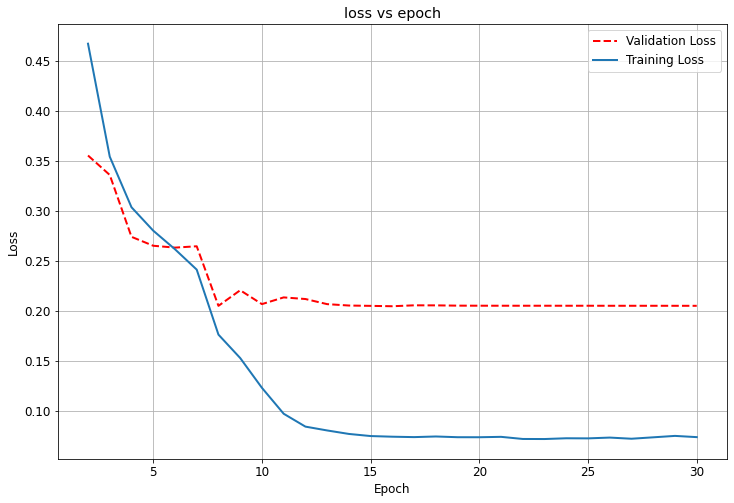

In [85]:
fig = plt.figure(figsize=(12,8))
plt.plot(classifier6.history['val_loss'][1:], 'r--', linewidth=2)
plt.plot(classifier6.history['loss'][1:], linewidth=2)

d = classifier6.history['val_loss']
plt.xticks(np.arange(3, len(d), step=5), np.arange(5, len(d)+1, step=5))

plt.legend(['Validation Loss', "Training Loss"], loc='upper right')
plt.title('loss vs epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()

fig.savefig('best-overall-loss-6-01986.png', bbox_inches='tight')

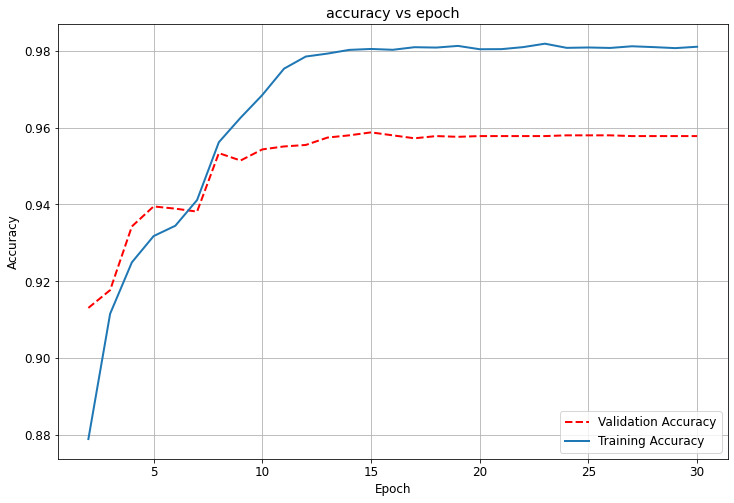

In [86]:
fig2 = plt.figure(figsize=(12,8))
plt.plot(classifier6.history['val_acc'][1:], 'r--', linewidth=2)
plt.plot(classifier6.history['acc'][1:], linewidth=2)

d = classifier6.history['val_acc']
plt.xticks(np.arange(3, len(d), step=5), np.arange(5, len(d)+1, step=5), fontsize=12)

plt.legend(['Validation Accuracy', "Training Accuracy"], loc='lower right')
plt.title('accuracy vs epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()

fig2.savefig('best-overall-accuracy-6-9590.png', bbox_inches='tight')